# Sixteen Question IND-COL - Confirmatory Factor Analysis (CFA)

Confirming the ability of a sixteen question measure to determine Horizontal vs. Vertical Independence vs. Collectivism.

**HDS 823 - Advanced Statistics for Healthcare, 
Professor N. Buonamia**

**Jupyter Notebook by K. Rasku RN BSN**

In [1]:
%matplotlib inline
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.preprocessing as pre

In [2]:
indcol_train = pd.read_csv("FATRAIN.csv")
indcol_train.shape


(600, 20)

In [3]:
indcol_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         587 non-null    float64
 1   Gender      595 non-null    float64
 2   Q1          600 non-null    int64  
 3   Q2          600 non-null    int64  
 4   Q3          600 non-null    int64  
 5   Q4          600 non-null    int64  
 6   Q5          600 non-null    int64  
 7   Q6          600 non-null    int64  
 8   Q7          600 non-null    int64  
 9   Q8          600 non-null    int64  
 10  Q9          600 non-null    int64  
 11  Q10         600 non-null    int64  
 12  Q11         600 non-null    int64  
 13  Q12         600 non-null    int64  
 14  Q13         600 non-null    int64  
 15  Q14         600 non-null    int64  
 16  Q15         600 non-null    int64  
 17  Q16         600 non-null    int64  
 18  Country     600 non-null    object 
 19  Validation  600 non-null    o

## Factor Analysis

The purpose of this notebook is to search for Latent Explanatory "Super Variables" or Factors within the data set.

The analysis is confirmatory, because the factors we are searching for have already been discovered and explicated in previous research, discussed in the article by Cozma (2011)

In [4]:
from factor_analyzer import FactorAnalyzer

Prepare for Factor Analysis by subsetting to the 16 question variables:

Q1. I'd rather depend on myself than others. 

Q2. If a worker gets the prize, I will feel proud. 

Q3. It is important that I do my job better than others. 

Q4. Parents and children must stay together as much as possible. 

Q5. I rely on myself most of the time; I rarely rely on others. 

Q6. The well-being of my workers is important to me. 

Q7. Winning is everything. 

Q8. It is my duty to take care of my family, even when I have sacrifice what I want. 

Q9. My personal identity, independent of others, is very important to me. 

Q10. To me, pleasure is spending time with others. 

Q11. Competition is the law of nature. 

Q12. Family members should stick together, no matter what sacrifices are required. 

Q13. I prefer to be direct and forthright when discussing things with people. 

Q14. I feel good when I cooperate with others. 

Q15. When another person does better than I do, I get tense and aroused. 

Q16. It is important to me that I respect the decisions made by my groups. 

Respondents level of agreement is recorded on a scale of 1 (least) to 10 (most).

In [5]:
analysis_ds = indcol_train[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", 
                            "Q14", "Q15", "Q16"]]

analysis_ds = analysis_ds.dropna()
analysis_ds.shape


(600, 16)

In [6]:
analysis_ds

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,1,1,1,3,4,5,8,1,7,7,3,2,1,1,3,5
1,1,1,1,1,4,1,9,9,3,3,1,1,1,2,5,2
2,1,1,1,9,9,1,9,1,1,9,9,1,1,9,1,1
3,3,1,1,1,9,1,8,1,6,1,3,1,1,1,7,8
4,6,1,1,6,7,1,8,3,1,5,4,1,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,9,9,9,9,7,9,9,9,5,9,9,9,5,9,5,9
596,9,9,9,8,7,9,5,9,5,9,6,9,7,9,1,9
597,9,9,9,2,9,9,5,5,5,5,6,5,9,9,1,9
598,9,9,9,7,8,5,3,1,4,1,1,1,9,9,9,1


## Spearman Correlation

Examine correlations to develop hypotheses about factor discovery.

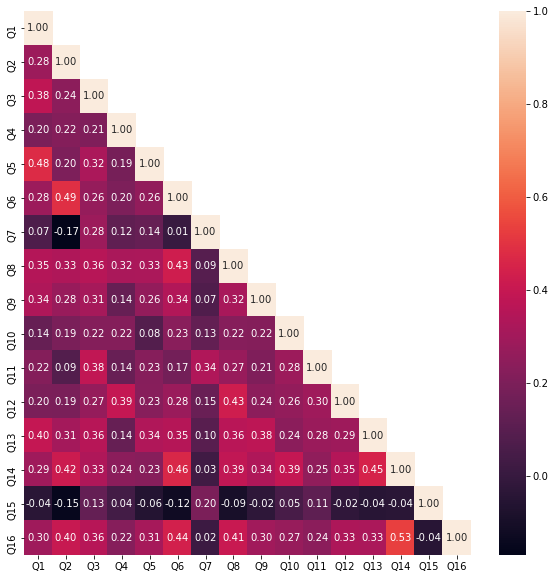

In [7]:
analysis_corr = analysis_ds.corr(method="spearman")
lower_corr = analysis_corr.where(np.tril(np.ones(analysis_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
analysis_hmap=sb.heatmap(lower_corr, annot=True, fmt=".2f")
fig = analysis_hmap.get_figure()

fig.savefig("factor_analysis_heatmap.png")

## Bartlett Test for Sphericity

A significant result (low p-value) indicates that a Factor Analysis may be appropriate.

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(analysis_ds)
chi_square_value, p_value

(3198.848163188156, 0.0)

## Kaiser-Meyer-Olkin (KMO) Test 

This test measures the suitability of the specific variables in the data set, and the model as a whole, for factor analysis. 

It estimates the *proportion of variance* among all the observed variables, and values range between 0 and 1. 

**Value less than 0.6 are likely to be inadequate**.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(analysis_ds)
kmo_model

0.9169640276231071

In [10]:
kmo_all

array([0.92214143, 0.91174691, 0.93141187, 0.8599738 , 0.90566642,
       0.93915908, 0.64014429, 0.94244342, 0.96054705, 0.90567728,
       0.89584363, 0.9060623 , 0.93480945, 0.91849063, 0.58018337,
       0.94485335])

### These results indicate that all of the variables are adequate.

Only Q7 and Q15 show any sign of being potentially inadequate, but this is only because they are key elements of a factor that shares very little of its variance with the other factors.


The most meritorious variables are: Q8 (It is my duty to take care of my family, even when I have sacrifice what I want) and Q16 (It is important to me that I respect the decisions made by my groups). 


In [11]:
# Save a copy before transforming to an np.array

analysis_ds_copy = analysis_ds.copy()

## Standardize the Data

In [12]:
s = pre.StandardScaler()
analysis_ds = s.fit_transform(analysis_ds)

In [13]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(method='ml', n_factors=4, rotation=None)
fa.fit(analysis_ds)

FactorAnalyzer(method='ml', n_factors=4, rotation=None, rotation_kwargs={})

## Show the Unrotated Loadings

fa.loadings_

In [14]:
fa.loadings_

array([[ 0.64243438,  0.02340141, -0.36533546, -0.04622477],
       [ 0.59445414, -0.34908964, -0.00738683,  0.00251972],
       [ 0.66205661,  0.25914019, -0.13626291,  0.06111454],
       [ 0.39673978,  0.09028539,  0.19359073, -0.27514134],
       [ 0.50016041,  0.11328611, -0.32069368, -0.15079774],
       [ 0.71594562, -0.19534914,  0.02658415,  0.03132465],
       [ 0.11832194,  0.62639558,  0.04819251,  0.06612866],
       [ 0.70616094,  0.011492  ,  0.03082601, -0.19865588],
       [ 0.56270348, -0.00956698, -0.1038175 ,  0.06202743],
       [ 0.46549172,  0.081105  ,  0.27686301,  0.23204161],
       [ 0.46794523,  0.42662777,  0.06114859,  0.11655659],
       [ 0.5574774 ,  0.14970718,  0.27107957, -0.34349023],
       [ 0.69320085, -0.00474465, -0.15115384,  0.09946558],
       [ 0.76542435, -0.15271047,  0.17658313,  0.17696435],
       [-0.04103032,  0.32980877,  0.03579435,  0.16812736],
       [ 0.70907434, -0.11187663,  0.06906441,  0.02468242]])

## Kaiser Criterion & Scree Plot

Examining Eigenvalues to determine the number of observable factors (Latent variables).

In [15]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.77265573, 1.60545542, 1.07798726, 0.99994206, 0.87546889,
       0.7009068 , 0.65278973, 0.61380365, 0.57797083, 0.54571067,
       0.49700542, 0.46327989, 0.44097097, 0.43159858, 0.40895142,
       0.33550267])

There are only 3 eigenvalues > 1. However, there is a 4th that is extremely close to 1.

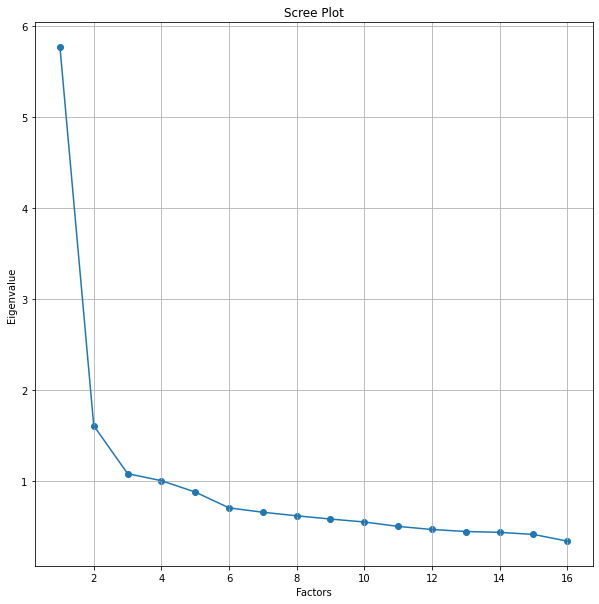

In [16]:
# Create scree plot 
plt.scatter(range(1,analysis_ds.shape[1]+1),ev)
plt.plot(range(1,analysis_ds.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Orthogonal Rotation: VARIMAX

In [17]:
fa = FactorAnalyzer(method="ml", rotation="varimax", n_factors=4)
fa.fit(analysis_ds)
fa.loadings_

array([[ 0.24159872,  0.68783252,  0.13167457,  0.00738744],
       [ 0.49304582,  0.34298109,  0.17775605, -0.28804998],
       [ 0.3393951 ,  0.53245342,  0.21243416,  0.28974335],
       [ 0.16196286,  0.13989377,  0.48107598,  0.03870016],
       [ 0.08149393,  0.58613193,  0.18885988,  0.05214038],
       [ 0.55826795,  0.40293773,  0.25135865, -0.12338668],
       [-0.04855711,  0.08571156,  0.13826706,  0.61987497],
       [ 0.36504948,  0.44070282,  0.46008208, -0.00735659],
       [ 0.3662459 ,  0.42107968,  0.13633515,  0.0363425 ],
       [ 0.5264843 ,  0.05565316,  0.16721451,  0.2133385 ],
       [ 0.27414376,  0.26864995,  0.21538182,  0.47391103],
       [ 0.24450736,  0.19409929,  0.64737761,  0.09003783],
       [ 0.45239773,  0.53441978,  0.14081369,  0.0565165 ],
       [ 0.72111627,  0.30451072,  0.24233054, -0.01527625],
       [-0.01533414, -0.04345099, -0.06530168,  0.36553785],
       [ 0.54305799,  0.37447987,  0.28921695, -0.04345469]])

## Oblique Rotation: QUARTIMIN

In [18]:
fa2 = FactorAnalyzer(method="ml", rotation="quartimin", n_factors=4)
fa2.fit(analysis_ds)
fa2.loadings_

array([[ 0.05039877,  0.70792686,  0.00382401, -0.00221507],
       [ 0.44239165,  0.19477387,  0.09729903, -0.29949806],
       [ 0.20802313,  0.45519339,  0.06492538,  0.28206855],
       [-0.01702424, -0.03615686,  0.55560434,  0.00540051],
       [-0.14295152,  0.62192669,  0.12706582,  0.03666196],
       [ 0.48893331,  0.21864374,  0.14227713, -0.13651758],
       [-0.10557403,  0.06545462,  0.08487112,  0.61928951],
       [ 0.1569557 ,  0.26480386,  0.43829004, -0.03799045],
       [ 0.29081138,  0.33962826,  0.01472345,  0.03100391],
       [ 0.60518765, -0.17158399,  0.04333482,  0.21429984],
       [ 0.21403472,  0.15388206,  0.09761314,  0.46982582],
       [ 0.01147843, -0.0515795 ,  0.73435466,  0.04638559],
       [ 0.36610163,  0.44509553, -0.02151115,  0.05211714],
       [ 0.73689595,  0.04346351,  0.0882019 , -0.02202909],
       [ 0.03948694, -0.0345165 , -0.12931942,  0.37709476],
       [ 0.46820122,  0.17618439,  0.18746188, -0.05808339]])

## Q9 and Q13 are cross-loading

Q13 and Q9 will be removed, and the analysis will be re-run (Quartimin)

In [19]:
analysis_ds = analysis_ds_copy.drop(["Q9", "Q13"], axis=1)
analysis_ds = s.fit_transform(analysis_ds)
fa = FactorAnalyzer(method='ml', n_factors=4, rotation=None)
fa.fit(analysis_ds)
ev, v = fa.get_eigenvalues()
ev

array([4.98237266, 1.60280333, 1.04417236, 0.96170864, 0.87409213,
       0.69761215, 0.60329766, 0.57875459, 0.51378638, 0.46707714,
       0.44706166, 0.4401885 , 0.42268791, 0.3643849 ])

In [20]:
fa2 = FactorAnalyzer(method="ml", rotation="quartimin", n_factors=4)
fa2.fit(analysis_ds)
fa2.loadings_

array([[ 1.30698739e-01,  6.31588061e-01, -2.37664469e-03,
         2.56501668e-02],
       [ 5.45248455e-01,  1.85423942e-01,  7.92366432e-03,
        -2.65655467e-01],
       [ 2.49798601e-01,  4.24331433e-01,  3.17468006e-02,
         3.09456103e-01],
       [ 8.79156281e-02,  6.73678199e-02,  3.82668579e-01,
         2.34505178e-02],
       [-7.47400684e-02,  6.34487570e-01,  6.41640552e-02,
         5.94206053e-02],
       [ 5.77162140e-01,  2.04355011e-01,  6.36256946e-02,
        -1.00197061e-01],
       [-1.28092416e-01,  8.90742874e-02,  4.48967877e-02,
         6.27715768e-01],
       [ 2.81207991e-01,  3.09070393e-01,  2.88284280e-01,
        -4.03567787e-03],
       [ 6.17260048e-01, -2.08747104e-01,  1.84908523e-02,
         2.39621623e-01],
       [ 2.11110662e-01,  1.30099260e-01,  9.09371928e-02,
         4.82365974e-01],
       [-1.75411722e-02, -3.28046208e-02,  8.89939885e-01,
         4.13736358e-04],
       [ 7.64334353e-01,  1.14474558e-02,  6.26164859e-02,
      

## Loadings Analysis

**Factor 1: Vertical Collectivism**

Stresses the role of workers and leaders, and of following leaders.  Less emphasis on family, more emphasis on society and following the leadership of social and political leaders. 

Questions with high loadings:  

Q2 If a worker gets the prize, I will feel proud. 

Q6 The well-being of my workers is important to me. 

Q10 To me, pleasure is spending time with others. 

Q14 I feel good when I cooperate with others. 

Q16 It is important to me that I respect the decisions made by my groups. 

 

**Factor 2: Horizontal Individualism** 

Stresses self-reliance, less emphasis on competition against others. “Live and let live.” 

Questions with high loadings: 

Q1 I'd rather depend on myself than others. 

Q3 It is important that I do my job better than others. 

Q5 I rely on myself most of the time; I rarely rely on others. 

 

**Factor 3: Horizontal Collectivism**

Stresses being part of a group, community or family and sacrificing for the good of these groups.  Less emphasis on following political leadership. 

Questions with high loadings: 

Q4 Parents and children must stay together as much as possible. 

Q8 It is my duty to take care of my family, even when I have sacrifice what I want. 

Q12 Family members should stick together, no matter what sacrifices are required. 

 

**Factor 4: Vertical Individualism**

Stresses individual competition, being “the best” and beating out everyone else. 

Questions with high loadings: 

Q7 Winning is everything. 

Q11 Competition is the law of nature. 

Q15 When another person does better than I do, I get tense and aroused. 

In [22]:
fa2.get_communalities()

array([0.41664922, 0.40231353, 0.33922745, 0.15925275, 0.41580839,
       0.38896479, 0.4203847 , 0.25772655, 0.48234575, 0.30244004,
       0.79337701, 0.58832439, 0.14835012, 0.34589468])

## Communality

The amount of these variables' variance explained by their loading on the factors.

Highest explained: Q12 (0.793), Q14 (0.588), Q10 (0.48)

In [23]:
fa2.get_factor_variance()

(array([2.12979927, 1.26467226, 1.0625917 , 1.00399613]),
 array([0.15212852, 0.09033373, 0.07589941, 0.07171401]),
 array([0.15212852, 0.24246225, 0.31836166, 0.39007567]))

## Factor Variance

First array: Sum of squared loadings (total factor variance)

Second array: Proportional variance of that factor vs. other factors

Third array: Cumulative variance of all factors (from left to right)

The three factors together account for approximately **39%** of the total variance in these variables.

In [24]:
fa2.get_uniquenesses()

array([0.58335078, 0.59768647, 0.66077255, 0.84074725, 0.58419161,
       0.61103521, 0.5796153 , 0.74227345, 0.51765425, 0.69755996,
       0.20662299, 0.41167561, 0.85164988, 0.65410532])

## Uniquenesses

These are variances associated with only a specific varible.

The variables with highest uniqueness of variation are Q4, Q6, Q8, Q11 and Q15.

Vertical Collectivism and Individualism appear to be unwaivering in their commitment to their respective belief systems.

In [25]:
# Reducing the data set based on the three factors 

df_reduced = fa2.fit_transform(analysis_ds)
df_reduced

array([[-2.20830443, -2.02943632, -0.16245342, -2.48542089],
       [-2.72864687, -2.17943296, -0.2446114 , -2.16909718],
       [-1.39646036, -1.86786964,  1.05600307, -2.17806653],
       ...,
       [ 0.74098439, -0.60053719, -0.63909642,  1.01968025],
       [-0.74209855, -2.14412786, -1.0564368 ,  0.22995233],
       [-0.46285942, -0.60876056, -0.89013116,  0.63416559]])

In [26]:
FACTORS = pd.DataFrame(df_reduced, columns =["FACTORS_1", "FACTORS_2", "FACTORS_3", "FACTORS_4"])


In [27]:
indcol_train.shape

(600, 20)

In [28]:
merged = indcol_train.merge(FACTORS, left_index=True, right_index=True)

In [29]:
merged

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q13,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4
0,20.0,0.0,1,1,1,3,4,5,8,1,...,1,1,3,5,Belgium,Training,-2.208304,-2.029436,-0.162453,-2.485421
1,25.0,0.0,1,1,1,1,4,1,9,9,...,1,2,5,2,Belgium,Training,-2.728647,-2.179433,-0.244611,-2.169097
2,23.0,1.0,1,1,1,9,9,1,9,1,...,1,9,1,1,Belgium,Training,-1.396460,-1.867870,1.056003,-2.178067
3,27.0,0.0,3,1,1,1,9,1,8,1,...,1,1,7,8,Belgium,Training,-2.783927,-2.407966,-0.167927,-1.395048
4,25.0,0.0,6,1,1,6,7,1,8,3,...,3,2,2,1,Belgium,Training,-2.748369,-2.181016,-0.021214,-1.470224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,23.0,1.0,9,9,9,9,7,9,9,9,...,5,9,5,9,Jordan,Training,1.230709,1.140086,0.958505,0.833979
596,47.0,0.0,9,9,9,8,7,9,5,9,...,7,9,1,9,USA,Training,1.220988,1.028549,-0.316331,0.812154
597,54.0,1.0,9,9,9,2,9,9,5,5,...,9,9,1,9,USA,Training,0.740984,-0.600537,-0.639096,1.019680
598,19.0,0.0,9,9,9,7,8,5,3,1,...,9,9,9,1,Kazakh,Training,-0.742099,-2.144128,-1.056437,0.229952


## Discover & Record the Dominant Factor for Each Row

In [30]:
HIGH_F1 = merged[(merged["FACTORS_1"]>merged["FACTORS_2"]) & (merged["FACTORS_1"] > merged["FACTORS_3"]) & (merged["FACTORS_1"] > merged["FACTORS_4"])]
HIGH_F2 = merged[(merged["FACTORS_2"]>merged["FACTORS_1"]) & (merged["FACTORS_2"] > merged["FACTORS_3"]) & (merged["FACTORS_2"] > merged["FACTORS_4"])]
HIGH_F3 = merged[(merged["FACTORS_3"]>merged["FACTORS_1"]) & (merged["FACTORS_3"] > merged["FACTORS_2"]) & (merged["FACTORS_3"] > merged["FACTORS_4"])]
HIGH_F4 = merged[(merged["FACTORS_4"]>merged["FACTORS_1"]) & (merged["FACTORS_4"] > merged["FACTORS_2"]) & (merged["FACTORS_4"] > merged["FACTORS_3"])]

f1_rows = HIGH_F1.index.values
f2_rows = HIGH_F2.index.values
f3_rows = HIGH_F3.index.values
f4_rows = HIGH_F4.index.values

for f in f1_rows:
    merged.at[f,"D_FACTOR"] = 1

for f in f2_rows:
    merged.at[f, "D_FACTOR"] = 2

for f in f3_rows:
    merged.at[f, "D_FACTOR"] = 3
    
for f in f4_rows:
    merged.at[f, "D_FACTOR"] = 4

In [31]:
merged

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4,D_FACTOR
0,20.0,0.0,1,1,1,3,4,5,8,1,...,1,3,5,Belgium,Training,-2.208304,-2.029436,-0.162453,-2.485421,3.0
1,25.0,0.0,1,1,1,1,4,1,9,9,...,2,5,2,Belgium,Training,-2.728647,-2.179433,-0.244611,-2.169097,3.0
2,23.0,1.0,1,1,1,9,9,1,9,1,...,9,1,1,Belgium,Training,-1.396460,-1.867870,1.056003,-2.178067,3.0
3,27.0,0.0,3,1,1,1,9,1,8,1,...,1,7,8,Belgium,Training,-2.783927,-2.407966,-0.167927,-1.395048,3.0
4,25.0,0.0,6,1,1,6,7,1,8,3,...,2,2,1,Belgium,Training,-2.748369,-2.181016,-0.021214,-1.470224,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,23.0,1.0,9,9,9,9,7,9,9,9,...,9,5,9,Jordan,Training,1.230709,1.140086,0.958505,0.833979,1.0
596,47.0,0.0,9,9,9,8,7,9,5,9,...,9,1,9,USA,Training,1.220988,1.028549,-0.316331,0.812154,1.0
597,54.0,1.0,9,9,9,2,9,9,5,5,...,9,1,9,USA,Training,0.740984,-0.600537,-0.639096,1.019680,4.0
598,19.0,0.0,9,9,9,7,8,5,3,1,...,9,9,1,Kazakh,Training,-0.742099,-2.144128,-1.056437,0.229952,4.0


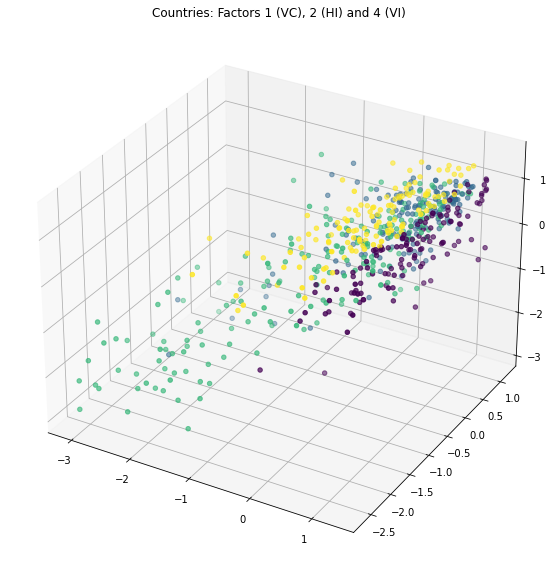

In [33]:
m_subset = merged.copy()

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
z = m_subset["FACTORS_4"]
y = m_subset["FACTORS_2"]
x = m_subset["FACTORS_1"]
c = m_subset["D_FACTOR"]
ax.scatter(x, y, z, c=c)
ax.set_title('Countries: Factors 1 (VC), 2 (HI) and 4 (VI)')
plt.show()

In [34]:
factor1_df = merged[merged["D_FACTOR"] == 1]
factor2_df = merged[merged["D_FACTOR"] == 2]
factor3_df = merged[merged["D_FACTOR"] == 3]
factor4_df = merged[merged["D_FACTOR"] == 4]

## Top 10 Factor 1 (Vertical Collectivist) Dominant Profiles


In [35]:
uc = factor1_df.copy()

uc.sort_values(by="FACTORS_1", ascending=False).head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4,D_FACTOR
179,27.0,0.0,9,9,6,9,1,9,1,9,...,9,7,9,USA,Training,1.340022,0.969506,-0.486957,-0.293257,1.0
257,23.0,0.0,7,9,7,7,1,9,1,9,...,9,5,9,USA,Training,1.290908,0.871419,-0.772858,-0.503591,1.0
575,22.0,1.0,9,9,9,7,8,9,7,9,...,9,1,9,USA,Training,1.235782,1.064252,0.379743,0.983281,1.0
595,23.0,1.0,9,9,9,9,7,9,9,9,...,9,5,9,Jordan,Training,1.230709,1.140086,0.958505,0.833979,1.0
571,20.0,1.0,9,9,9,9,7,9,9,9,...,9,7,9,USA,Training,1.227615,1.129020,1.088154,0.810968,1.0
569,20.0,0.0,9,9,9,9,9,9,7,9,...,9,7,9,USA,Training,1.227295,1.127258,0.785757,1.061277,1.0
596,47.0,0.0,9,9,9,8,7,9,5,9,...,9,1,9,USA,Training,1.220988,1.028549,-0.316331,0.812154,1.0
568,23.0,0.0,8,9,9,9,9,9,8,9,...,9,1,9,Jordan,Training,1.209727,1.171932,0.559519,0.993055,1.0
524,21.0,0.0,8,8,9,9,8,9,5,9,...,9,9,9,Jordan,Training,1.185488,1.089155,0.694800,0.714159,1.0
562,26.0,0.0,8,9,9,7,1,9,2,9,...,9,4,9,USA,Training,1.176526,0.858002,-0.872176,-0.092246,1.0


## Top 10 Factor 2 (Horizontal Individualist) Dominant Profiles


In [36]:
ic = factor2_df.copy()

ic.sort_values(by="FACTORS_2", ascending=False).head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4,D_FACTOR
570,20.0,0.0,9,9,9,9,7,9,9,9,...,7,1,9,USA,Training,0.916417,1.124764,0.694109,0.896113,2.0
457,24.0,1.0,9,5,9,9,9,5,7,9,...,8,1,9,Jordan,Training,0.429804,1.094256,0.926132,0.775649,2.0
458,24.0,1.0,9,5,9,9,9,5,7,9,...,8,1,9,Jordan,Training,0.429804,1.094256,0.926132,0.775649,2.0
178,24.0,1.0,9,9,6,9,9,9,6,9,...,9,1,9,USA,Training,1.041770,1.086247,-0.377819,0.861373,2.0
561,25.0,0.0,8,9,9,9,8,9,9,9,...,9,9,9,Jordan,Training,1.019291,1.084256,0.846442,0.839837,2.0
478,33.0,0.0,6,7,9,9,7,8,6,9,...,9,6,8,Iran,Training,0.853185,1.071253,0.749234,0.251446,2.0
554,25.0,0.0,6,9,9,9,8,9,3,9,...,8,5,9,Iran,Training,0.976461,1.064434,-0.080742,0.605309,2.0
505,33.0,0.0,9,7,9,9,9,8,8,9,...,9,8,8,Jordan,Training,0.780362,1.060215,0.923145,0.899569,2.0
445,21.0,0.0,9,5,9,9,8,8,7,9,...,9,9,9,Iran,Training,0.329980,1.053455,0.808245,1.053419,2.0
237,22.0,1.0,7,8,7,9,8,9,8,9,...,9,9,7,Jordan,Training,0.759935,1.050567,0.872831,0.404814,2.0


## Top 10 Factor 3 (Horizontal Collectivist) Dominant Profiles


In [37]:
hoc = factor3_df.copy()
hoc.sort_values(by="FACTORS_3", ascending=False).head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4,D_FACTOR
420,21.0,0.0,1,3,9,9,3,2,9,6,...,9,9,9,Jordan,Training,0.025990,0.867435,2.112485,-1.655301,3.0
410,43.0,1.0,6,1,9,6,6,2,9,7,...,1,9,7,USA,Training,-1.674886,-0.571908,2.061086,-0.455223,3.0
432,19.0,1.0,8,4,9,5,3,2,9,5,...,3,5,1,Jordan,Training,-1.520750,-0.211868,1.762340,-0.919921,3.0
279,21.0,0.0,9,1,8,9,9,8,9,9,...,9,8,5,Jordan,Training,0.068440,1.017721,1.686838,0.448408,3.0
409,22.0,1.0,6,1,9,5,8,7,9,9,...,4,2,1,Jordan,Training,-1.151080,0.706780,1.604463,-0.142386,3.0
450,26.0,1.0,9,5,9,9,7,6,9,9,...,9,7,9,USA,Training,0.604325,1.088473,1.513492,0.542462,3.0
462,32.0,1.0,8,6,9,9,8,9,9,9,...,9,9,9,Jordan,Training,0.981865,1.129897,1.497415,0.651194,3.0
425,31.0,1.0,9,3,9,9,9,6,9,9,...,3,9,5,Jordan,Training,-1.340551,0.861752,1.432385,0.893054,3.0
412,20.0,0.0,9,1,9,5,8,8,8,2,...,7,8,9,Mexico,Training,-0.321840,-0.056285,1.359307,0.283115,3.0
413,63.0,0.0,9,1,9,7,7,9,8,9,...,8,5,8,USA,Training,0.278674,0.115496,1.339737,0.589960,3.0


## Top 10 Factor 4 (Vertical Individualist) Dominant Profiles


In [38]:
vi = factor4_df.copy()
vi.sort_values(by="FACTORS_4", ascending=False).head(10)

,Age,Gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Country,Validation,FACTORS_1,FACTORS_2,FACTORS_3,FACTORS_4,D_FACTOR
572,20.0,0.0,9,9,9,5,9,9,1,9,...,5,1,9,USA,Training,0.034329,-0.432534,-1.659568,1.478893,4.0
579,23.0,1.0,9,9,9,1,9,9,1,9,...,9,5,9,USA,Training,0.550091,-1.794937,-1.996976,1.386538,4.0
424,47.0,1.0,9,3,9,7,9,9,9,9,...,9,1,9,Iran,Training,0.232223,-0.708060,0.626752,1.342827,4.0
541,26.0,1.0,9,8,9,8,9,9,7,9,...,9,8,9,Iran,Training,0.681158,0.747389,0.476200,1.333384,4.0
592,39.0,1.0,9,9,9,5,9,9,5,9,...,8,5,8,Iran,Training,0.632270,-1.238661,-0.554039,1.260565,4.0
593,47.0,0.0,9,9,9,9,9,9,9,9,...,9,3,9,Romania,Training,1.004029,1.153135,0.649602,1.252628,4.0
584,26.0,0.0,9,9,9,5,9,9,1,9,...,9,7,9,New Zea,Training,1.022450,-0.302238,-0.494682,1.249675,4.0
594,23.0,1.0,9,9,9,9,9,9,7,9,...,9,9,9,Iran,Training,0.958169,1.094624,0.663677,1.218608,4.0
449,25.0,0.0,9,5,9,9,9,9,5,9,...,9,1,9,USA,Training,0.266092,0.965158,-1.089147,1.209946,4.0
588,38.0,0.0,9,9,9,8,9,8,5,8,...,8,1,9,Romania,Training,0.685120,0.980007,-0.254308,1.174340,4.0


In [39]:
merged["D_FACTOR"].value_counts()

3.0    196
2.0    148
4.0    128
1.0    128
Name: D_FACTOR, dtype: int64

In [40]:
merged.to_csv("FSTRAIN_FACTORS.csv")

## Load Test Set

In [41]:
indcol_test = pd.read_csv("FATEST.csv")
indcol_test.shape

(200, 20)

In [42]:
analysis_ds = indcol_test[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10", "Q11", "Q12", "Q13", 
                            "Q14", "Q15", "Q16"]]

analysis_ds = analysis_ds.dropna()
analysis_ds.shape


(200, 16)

In [43]:
chi_square_value,p_value=calculate_bartlett_sphericity(analysis_ds)
chi_square_value, p_value

(1141.6256272225955, 1.946347387931915e-166)

In [44]:
kmo_all,kmo_model=calculate_kmo(analysis_ds)
kmo_model

0.863610854434575

In [45]:
kmo_all

array([0.8983193 , 0.86622445, 0.87076121, 0.76387993, 0.87455803,
       0.88897886, 0.70389414, 0.88334535, 0.88383666, 0.87134731,
       0.86744464, 0.80635395, 0.94097989, 0.87003686, 0.480144  ,
       0.90507933])

In [46]:
# Q15's KMO is abysmal (<50), normally this would be dropped.

In [47]:
analysis_ds_copy = analysis_ds.copy()
analysis_ds = s.fit_transform(analysis_ds)

# Unrotated Loadings
fa = FactorAnalyzer(method='ml', n_factors=4, rotation=None)
fa.fit(analysis_ds)

# Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.65743728, 1.66938933, 1.21800017, 1.0274931 , 0.96525201,
       0.78107701, 0.68709639, 0.65148624, 0.56189995, 0.53777558,
       0.49504552, 0.42507763, 0.39622042, 0.34452182, 0.31837081,
       0.26385674])

In [48]:
# Test Set: Quartimin

fa2 = FactorAnalyzer(method="ml", rotation="quartimin", n_factors=4)
fa2.fit(analysis_ds)
fa2.loadings_

array([[-0.02310163,  0.80221863, -0.05436686,  0.04755203],
       [ 0.37928857,  0.2644117 , -0.00173759, -0.30574876],
       [ 0.12664661,  0.5849556 ,  0.25331406,  0.09357557],
       [ 0.02680201,  0.36654686,  0.00222327,  0.01749279],
       [-0.12363013,  0.57447445,  0.17011032, -0.09997267],
       [ 0.56743708,  0.12414814,  0.07767246, -0.15976283],
       [-0.02707873, -0.01897767,  0.81893537,  0.06442579],
       [ 0.27329013,  0.3767646 ,  0.2213643 , -0.20012079],
       [ 0.22673776,  0.51556795, -0.2001634 ,  0.06958786],
       [ 0.71627931, -0.17737797,  0.09631194, -0.06449844],
       [ 0.16230699,  0.14127371,  0.45723888,  0.08370511],
       [ 0.33882913,  0.15492368,  0.20818941, -0.0364947 ],
       [ 0.44168052,  0.16557386,  0.24015949, -0.01992796],
       [ 0.88733204,  0.01298808, -0.07754767,  0.08601686],
       [ 0.02663427,  0.05558571,  0.07587252,  0.788195  ],
       [ 0.50556879,  0.27980821, -0.00312823, -0.00419221]])

In [49]:
# Unlike the Training Set, none of these variables have significantly ambiguous loadings

In [50]:
fa2.get_communalities()

array([0.64930537, 0.30725869, 0.43113681, 0.13538589, 0.38423736,
       0.36895477, 0.67589923, 0.30568955, 0.36212818, 0.55795504,
       0.26237576, 0.18348122, 0.28057009, 0.80093938, 0.63080715,
       0.3339198 ])

In [51]:
fa2.get_factor_variance()

(array([2.51820504, 2.12794196, 1.1929678 , 0.83092948]),
 array([0.15738782, 0.13299637, 0.07456049, 0.05193309]),
 array([0.15738782, 0.29038419, 0.36494468, 0.41687777]))

In [52]:
fa2.get_uniquenesses()

array([0.35069463, 0.69274131, 0.56886319, 0.86461411, 0.61576264,
       0.63104523, 0.32410077, 0.69431045, 0.63787182, 0.44204496,
       0.73762424, 0.81651878, 0.71942991, 0.19906062, 0.36919285,
       0.6660802 ])

## Calculate Cronbach's Alpha

Is the scale valid? We are looking for a value between .6 and .7 (or maybe higher)

In [55]:
# This code was written by Max Hilsdorf

def cronbach_alpha(df):
    # 1. Transform the df into a correlation matrix
    df_corr = df.corr(method="spearman")
    
    # 2.1 Calculate N
    # The number of variables equals the number of columns in the df
    N = df.shape[1]
    
    # 2.2 Calculate R
    # For this, we'll loop through the columns and append every
    # relevant correlation to an array calles "r_s". Then, we'll
    # calculate the mean of "r_s"
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # 3. Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

cronbach_alpha(analysis_ds_copy)

0.8363220222177796